## Zera funkcji jednej zmiennej
### Bisekcja - Opis metody krok po kroku

Niech będzię dana pewna funkcja np. $f(x) =2x^3+x-3+\exp(2x)$. Szukamy zera tej funkcji. Na początek narysujmy jej wykres.

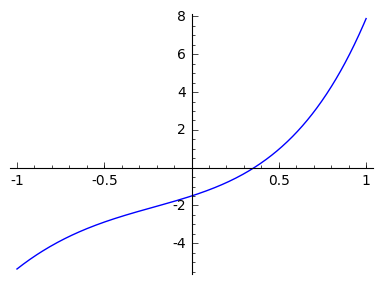

In [2]:
f(x)=2*x^3+x-2.5+exp(2*x)
plot(f(x),figsize=4)

<p>Z wykresu widzimy, że zero tej funkcji znajduje się gdzieś pomiędzy punktem $x_1=0 $ a $x_2=0.5$. Te dwa punkty przejmniemy jako punkty startowe w metodzie bisekcji. Obliczymy punkt znajdujący się w środku przedziału $c= (a+b)/2$</p>

In [3]:
a=0
b=0.5
przedzial = [(a,b)]
c = (a+b)/2
show("c = %s" %float(c))

'c = 0.25'

<p>Następnie porównajmy wartości funkcji w punktach a, b oraz c.</p>

In [4]:
show("f(a) = %s" %float(f(a))); show("f(b) = %s" %float(f(b))); show("f(c) = %s" %float(f(c)))

'f(a) = -1.5'

'f(b) = 0.968281828459'

'f(c) = -0.5700287293'

<p>Widzmy, że funkcja zmienia znak w przedziale $[b,c]$, zatem punkty te przyjmujemy jako nowe krańce przedziału, w którym szukamy zera funkcji $f$. Oraz ponownie wyznaczamy środek naszego nowego przedziału, i porównujemy wartości funkcji w naszych nowych punktach.</p>

In [5]:
a=a
b=c
c = (a+b)/2
show("c = %s" %float(c))
show("f(a) = %s" %float(f(a))); show("f(b) = %s" %float(f(b))); show("f(c) = %s" %float(f(c)))

'c = 0.125'

'f(a) = -1.5'

'f(b) = -0.5700287293'

'f(c) = -1.08706833331'

<p>Tym razem widzimy, że funkcja zmienia znak w przedziale $[a,c]$. Powtarzamy więc procedurę przyjmując te punkty jako nowe krańce przedziału.</p>

In [6]:
a=a
b=c
c = (a+b)/2
show("c = %s" %float(c))
show("f(a) = %s" %float(f(a))); show("f(b) = %s" %float(f(b))); show("f(c) = %s" %float(f(c)))

'c = 0.0625'

'f(a) = -1.5'

'f(b) = -1.08706833331'

'f(c) = -1.30386326568'

<p>Procedruę tę kontynujemy, tak długo aż wyznaczone $f(c)$ jest mniejsze niż dokładność jaką planowaliśmy osiągnąć. Poniższy fragemnt kodu obrazuje implementację metody bisekcji.</p>

In [2]:
from ipywidgets import interact


eps = 3.16227766017e-09
zero = 1.76929235412
f(c) = -8.910259197136838e-10
liczba iteracji = 32


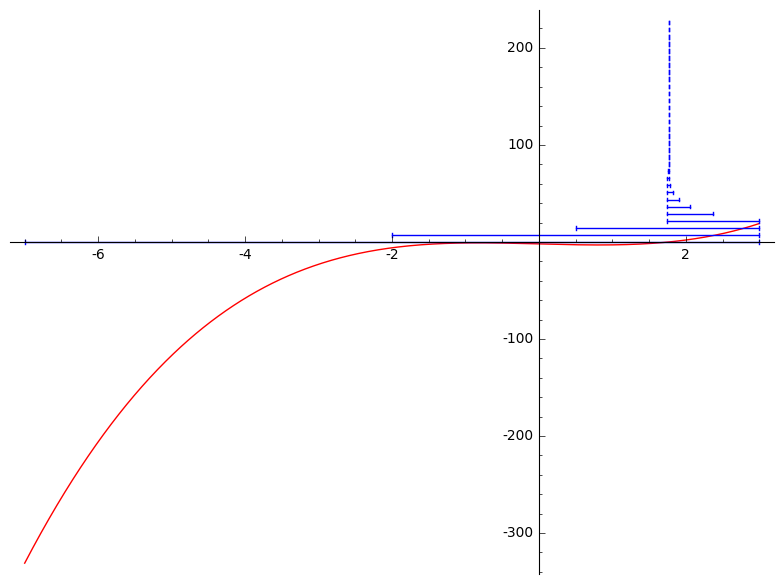

In [16]:
def bisect_method(f, a, b, eps):
    try:
        f =f._fast_float_(f.variables()[0])
    except AttributeError:
        pass
    intervals = [(a,b)]
    two = float(2); eps = float(eps)
    while True:
        c = (a+b)/two
        fa = f(a); fb = f(b); fc = f(c)
        if abs(fc) < eps: return c, intervals
        if fa*fc < 0:
            a, b = a, c
        elif fc*fb < 0:
            a, b = c, b
        else:
            raise ValueError, "f must have a sign change in the interval (%s,%s)"%(a,b)
        intervals.append((a,b))
        
f = x^3-2*x-2

@interact(a = (-3), b = (3), eps=(-16.,-1,.1))
def _(a,b,eps):
    eps = 10^eps
    print "eps = %s"%float(eps)
    try:
        c, intervals = bisect_method(f, a, b, eps)
    except ValueError:
        print "Funkcja f musi mieć wartości o przeciwnych znakach na końcach przedziału"
        show(plot(f, a, b, color='red'), xmin=a, xmax=b)
    else:
        print "zero =", c
        print "f(c) = %r"%f(x=c)
        print "liczba iteracji =", len(intervals)
        P = plot(f, a, b, color='red')
        h = (P.ymax() - P.ymin())/ (1.5*len(intervals))
        L = sum(line([(c,h*i), (d,h*i)]) for i, (c,d) in enumerate(intervals) )
        L += sum(line([(c,h*i-h/4), (c,h*i+h/4)]) for i, (c,d) in enumerate(intervals) )
        L += sum(line([(d,h*i-h/4), (d,h*i+h/4)]) for i, (c,d) in enumerate(intervals) )
        show(P + L, xmin=a, xmax=b)

<p>Jak użyć tej medoty poza interaktem:</p>

In [4]:
x0,l=bisect_method(sin(x),-1r,2r,0.01)

In [5]:
x0

0.0078125

In [17]:
table(l)

,
,
,
,
,
,
,


<h3>Zadanie </h3>
<p>Oszacować ile minimalne należy wykonać iteracji aby osiągnąć zadaną dokładność $\varepsilon$?</p>

<p>Rozwiązanie.</p>
<p>Zauważmy, że po $n$ iteracja długość przedziału wynosi</p>

In [9]:
var('a b n eps')
d=(a-b)/2^(n-1)
show(d)

(a - b)/2^(n - 1)

<p>Więc błąd $r$ jest nie większy, niż połowa długości przedziału. Stąd możemy wyznaczyć minimalne $n$ dla którego błąd będzie równy $\varepsilon$</p>

In [10]:
r=d/2
show(solve(r==eps,n)[0].rhs().full_simplify())

log((a - b)/eps)/log(2)

<h2>Metoda Newtona dla funkcji jednej zmiennej</h2>

eps = 3.16227766017e-09
root = 0.0
f(c) = -2.0
Liczba iteracji = 101
ROZBIEŻNY!


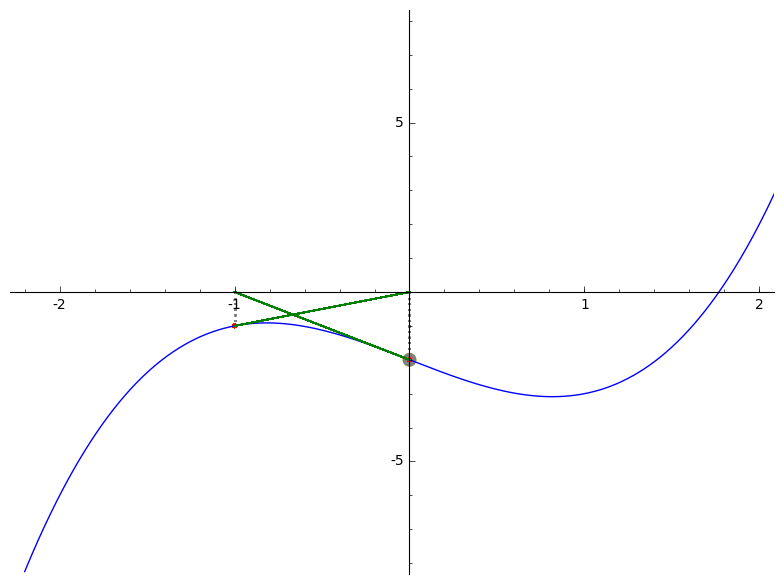

In [4]:
def newton_method(f, c, eps, maxiter=100):
    x = f.variables()[0]
    fprime = f.derivative(x)
    try:
        g = f._fast_float_(x)
        gprime = fprime._fast_float_(x)
    except AttributeError:
        g = f; gprime = fprime
    iterates = [c]
    for i in xrange(maxiter):
       fc = g(c)
       if abs(fc) < eps: return c, iterates
       c = c - fc/gprime(c)
       iterates.append(c)
    return c, iterates
var('x')    
f(x) = x^3-2*x-2
@interact( eps=(-16.,-1),c=(-3,3,0.1))
def _( eps,c):
    var('x')
    a=-2.2
    b=2.2
    eps = 10^(eps)
    print "eps = %s"%float(eps)
    z, iterates = newton_method(f, c, eps)
    print "root =", z
    print "f(c) = %r"%f(x=z)
    n = len(iterates)
    print "Liczba iteracji =", n
    if abs( f(iterates[-1]) )>eps:
        print "ROZBIEŻNY!"
    fprime = f.derivative(x)
    P = plot(f(x) , (x,a,b), rgbcolor='blue')
    
    pkts=[(y,f(y)) for y in iterates]
    styczne=[(y,fprime(y)) for y in iterates]
    stycz_plot=[]
    
    for n,(x0,a) in enumerate(styczne[:-1]):
        x1=styczne[n+1][0]
        if x0-x1==0:
            print "DOKLADNIE ZERO! break"
            break
        if a*f(x0)<0:
            stycz_plot.append( plot(a*(x-x0)+f(x0),(x,x0,x1),color='green') )
        else:
            stycz_plot.append( plot(a*(x-x0)+f(x0),(x,x1,x0),color='green') )
        stycz_plot.append( line( [(x1,0),(x1,f(x1))],color='gray',linestyle='dotted') )
        stycz_plot.append( point( [(x1,f(x1))],color='red') )
   
       

    P2=point( pkts[-1],color='yellow',size=100)
    P3=point( pkts[0],color='gray',size=100)

    show(P+P2+P3 + sum(stycz_plot),xmin=-2.2,ymin=-8,xmax=2,ymax=8)

<h3>Metoda Newtona daje wynik po pierwszej iteracji dla funkcji liniowej:</h3>

In [21]:
f(x)=4*x+3
newton_method(f, 1., 0., maxiter=5)

(-0.750000000000000,
 [1.00000000000000,
  -0.750000000000000,
  -0.750000000000000,
  -0.750000000000000,
  -0.750000000000000,
  -0.750000000000000])

<h3>Zbieżność dla zer jednokrotnych i wielokrotnych:</h3>

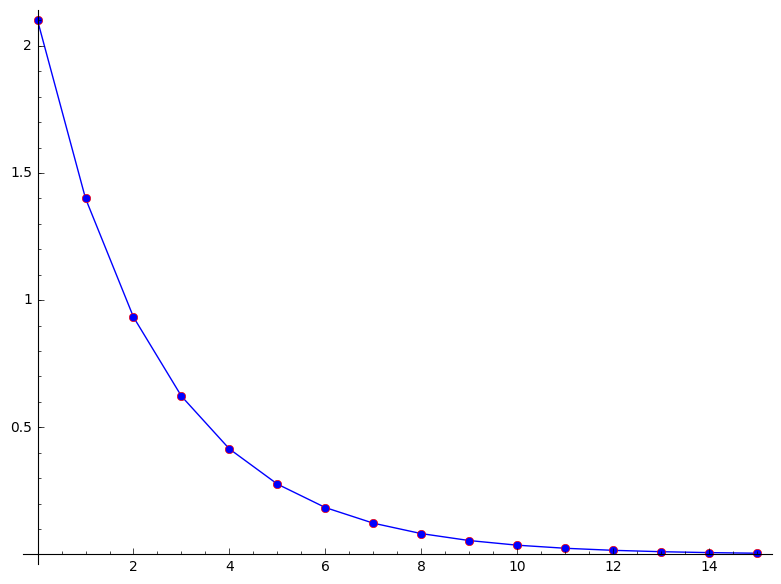

In [6]:
@interact(n=(1,6,1)) 
def _(n):
    f(x)=x^n
    ciag=newton_method(f, 2.1, 0., maxiter=15)[1]
    plt=line([(i,c) for i,c in enumerate(ciag)],marker="o",markeredgecolor='red')
    show(plt)

<h3>Obliczanie pierwiastka z $2$  metodą Newtona  $x^2-2$.</h3>

In [5]:
f(x)=x^2-2
ciag=newton_method(f, 2.1, 0., maxiter=15)[1]
ciag

[2.10000000000000,
 1.52619047619048,
 1.41832144714360,
 1.41421951120695,
 1.41421356238561,
 1.41421356237310,
 1.41421356237309,
 1.41421356237310,
 1.41421356237309,
 1.41421356237310,
 1.41421356237309,
 1.41421356237310,
 1.41421356237309,
 1.41421356237310,
 1.41421356237309,
 1.41421356237310]

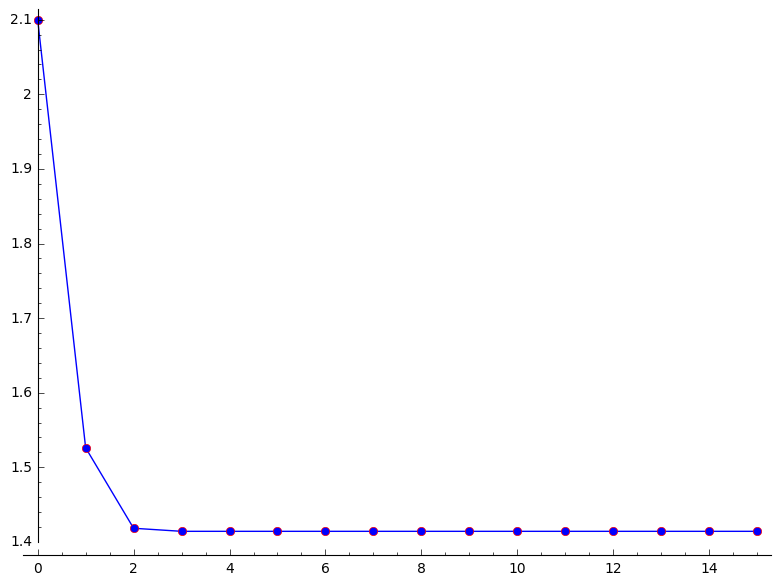

In [7]:
line([(i,c) for i,c in enumerate(ciag)],marker="o",markeredgecolor='red')

<p>Zbieżność nie jest monotoniczna, można zobaczyć jak zależy ona od punktu początkowego:</p>

In [8]:
f(x)=x^2-2
ciaglst=[]
for x0 in srange(-3.1,3.1,0.2):
    ciaglst.append(newton_method(f, x0, 0., maxiter=7)[1])

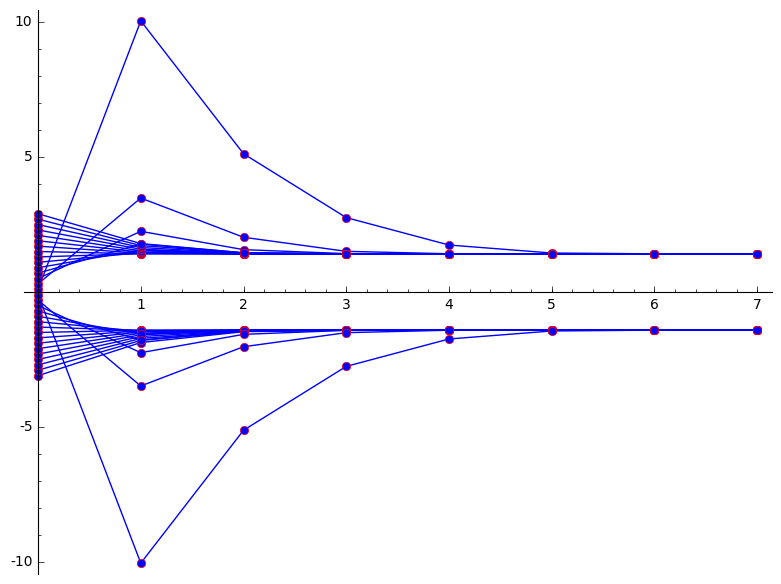

In [9]:
sum([ line([(i,c) for i,c in enumerate(ciag)],marker="o",markeredgecolor='red') for ciag in ciaglst ])

<p>Jeśli wystartujemy w $x_0=0$, to iterację są rozbieżne, zobaczmy co będzie jeśli zaczniemy blisko zera:</p>

In [10]:
newton_method(f, 1/10000, 0., maxiter=7)[1]

[1/10000,
 10000.000049999999,
 5000.000125,
 2500.0002624999947,
 1250.0005312499552,
 625.0010656246376,
 312.5021328095908,
 156.2542663829556]

<p>Jak dokładnie można oszacować $\sqrt{2}$?</p>

In [11]:
x0=(1.2).n(digits=100)
iteracje=[x0]
for i in range(10):
    x0=x0-x0/2 + 1/x0
    iteracje.append(x0)

In [12]:
parent(x0)
iteracje[-1]

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573

In [40]:
@interact(n=(4,100,1))
def _(n):
    n=int(n)
    x0=(1.2).n(digits=(n) )
    iteracje=[x0]
    for i in range(10):
        x0=x0-x0/2 + 1/x0
        iteracje.append(x0)
    g=points([(i,log( abs( (sqrt(2).n(digits=n)-c.n(digits=n)).n(digits=n) ))) for i,c in enumerate(iteracje)])
    #g.show()
    print(table(columns=[iteracje]))
    print "x0 to zmienną:", parent(x0)

  1.2000000000000000000000000000000000000000000000
  1.4333333333333333333333333333333333333333333333
  1.4143410852713178294573643410852713178294573643
  1.4142135681220935543559773198986236008166196112
  1.4142135623730950604869760676033824157729404438
  1.4142135623730950488016887242096981268459520394
  1.4142135623730950488016887242096980785696718754
  1.4142135623730950488016887242096980785696718754
  1.4142135623730950488016887242096980785696718754
  1.4142135623730950488016887242096980785696718754
  1.4142135623730950488016887242096980785696718754
x0 to zmienną: Real Field with 160 bits of precision


<p>Zobaczmy jak wygladaja wykresy kolejnych iteracji $f^{(n)}(x)$:</p>

In [15]:
f(x)=x^3-2*x-2
#f(x)=x^2-2
g(x) =x- f(x)/f.derivative(x)
g(x).expand().simplify()

-x^3/(3*x^2 - 2) + x + 2*x/(3*x^2 - 2) + 2/(3*x^2 - 2)

In [16]:
%%time 
expr=g(x)
it_g=[expr]
for i in range(5):
    expr=g(expr)
    it_g.append(expr)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.14 ms


In [17]:
%%time 
listplt=[ plot( ex,(x,-2,2),detect_poles="show",ymax=5,ymin=-5,figsize=(15,4)) for ex in it_g ]

CPU times: user 1min 38s, sys: 24 ms, total: 1min 38s
Wall time: 1min 38s


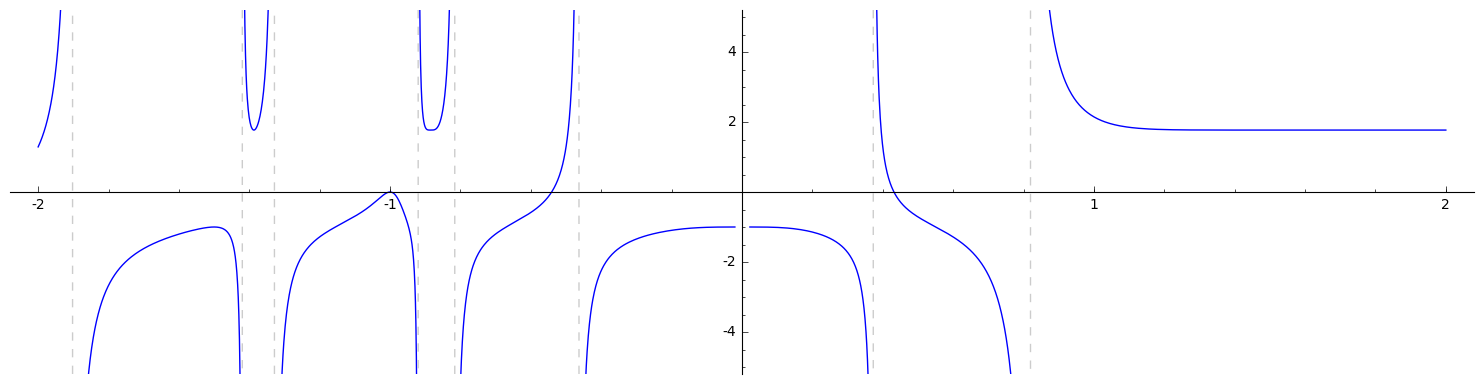

In [18]:
@interact(n=(0,5,1))
def _(n):
    listplt[n].show()

In [140]:
#animate(listplt).show()

<h3>Własności metody Newtona dla funkcji rzeczywistych na przykładzie $x^3-2x-2$.</h3>

In [41]:
f(x)=x^3-2*x-2

<p>Jest równanie trzeciego stopnia więc instnieją $3$ pierwiastki, z których przynajmiej jeden jest rzeczywisty: </p>

In [43]:
for x0,i in f.roots():
    print( x0.n() )

-0.884646177119316 - 0.589742805022206*I
-0.884646177119316 + 0.589742805022206*I
1.76929235423863


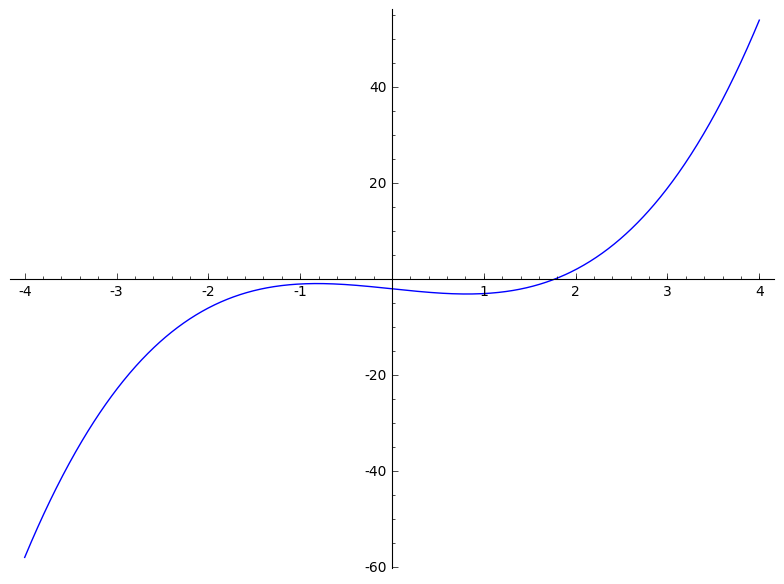

In [44]:
f.plot(-4,4)

<p>Szukając tych pierwiastków metodą Newtona, jeśli wystartujemy z punktu $x_0=1$, to otrzyamy właściwe rozwiązanie: </p>

In [45]:
newton_method(f, 1., 0.0001, maxiter=17)

(1.76930139743645,
 [1.00000000000000,
  4.00000000000000,
  2.82608695652174,
  2.14671901373924,
  1.84232627714009,
  1.77284763643924,
  1.76930139743645])

<p>Jednak startują np. z $x_0=0$, iteracje Newtona wogóle nie są zbieżne:</p>

In [46]:
newton_method(f, 0, 0.0001, maxiter=17)

(-1.0,
 [0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0,
  0.0,
  -1.0])

<p>Możemy sprawdzić dla jakich wartości $x_0$ uzyskamy zbieżność:</p>

In [47]:
it_tbl=[]
for x0 in srange(-4,4.001,0.1):
    c,it=newton_method(f, x0, 0.000, maxiter=17)
    it_tbl.append( list(it) )
it_tbl.reverse()

In [48]:
M=matrix(it_tbl).transpose()

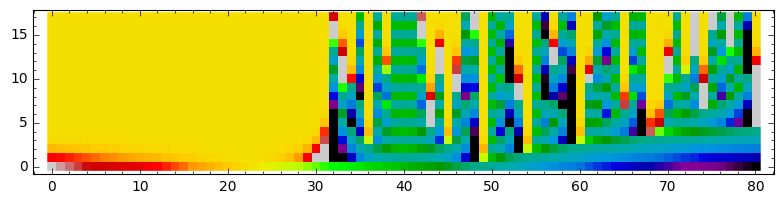

In [49]:
matrix_plot(M,origin='lower',cmap='spectral',vmin=-4,vmax=4)

<h3>Dlaczego się tak dzieje:</h3>

In [50]:
#f(x)=x^2+1
f(x)=x^3-2*x-2
# ciekawe -1.1 1.1 -2.1 
c,it=newton_method(f, -1.1, 0, maxiter=15)
it

[-1.10000000000000,
 -0.406134969325154,
 -1.23974575401222,
 -0.693591076491099,
 -2.39346982403335,
 -1.67409286650060,
 -1.15228733046890,
 -0.534431005196396,
 -1.48249541184216,
 -0.983249166237644,
 0.109770991993889,
 -1.01975425879877,
 -0.107959953615140,
 -1.01651342074745,
 -0.0915772496911049,
 -1.01196206406620]

In [51]:
g=f.derivative()

In [52]:
pkts=[(x,f(x)) for x in it]

In [53]:
styczne=[(x,g(x)) for x in it]

In [54]:
var('x')
stycz_plot=[]
for n,(x0,a) in enumerate(styczne[:-1]):
    x1=styczne[n+1][0]
    if x0-x1==0:
        print "DOKLADNIE ZERO! break"
        break
    if a*f(x0)<0:
        stycz_plot.append( plot(a*(x-x0)+f(x0),(x,x0,x1),color='green') )
    else:
        stycz_plot.append( plot(a*(x-x0)+f(x0),(x,x1,x0),color='green') )
    stycz_plot.append( line( [(x1,0),(x1,f(x1))],color='gray',linestyle='dotted') )
    stycz_plot.append( point( [(x1,f(x1))],color='red') )

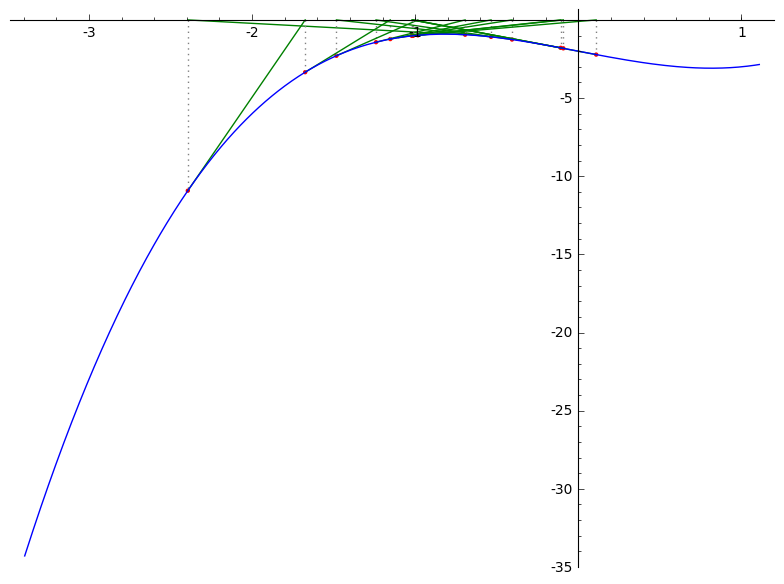

In [55]:
sum(stycz_plot)+f.plot(min(it)-1,max(it)+1)

In [56]:
animplt=[]
for n,p in enumerate(stycz_plot[1:]):
    animplt.append( sum( stycz_plot[:(n+1)] )+f.plot(min(it)-1,max(it)+1) )
animplt=[sum( stycz_plot[:(n+1)] )+f.plot(min(it)-0.2,max(it)+.2)  for n in range(len(stycz_plot))]
animate(animplt).show()

Animation with 45 frames

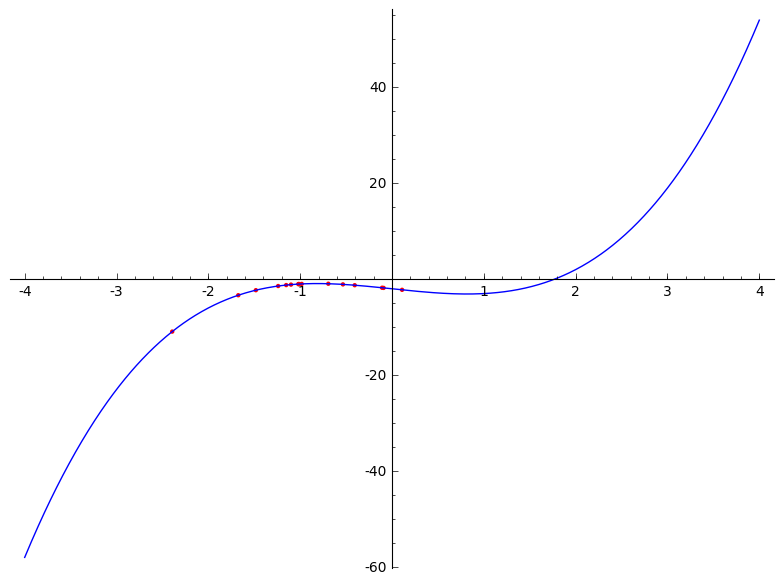

In [57]:
points(pkts,color='red')+f.plot(-4,4)

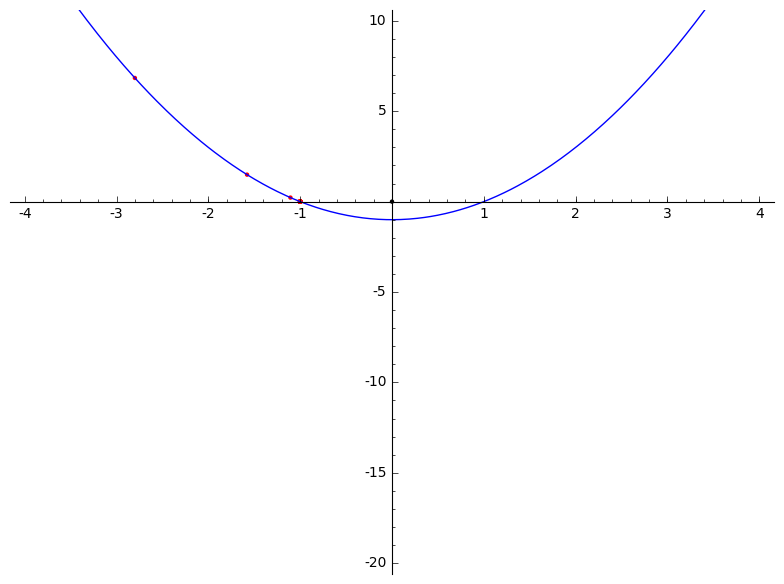

In [59]:
f(x)=x^2-1
@interact(x0=(-4,4,0.1),n=(1,40,1))
def _(x0,n):
    c,it=newton_method(f, x0, 0, maxiter=int(n))
    pkts=[(x,f(x)) for x in it]
    plt=points(pkts,color='red')+f.plot(-4,4)+points((0,0),color='black')
    plt.show(ymax=10,ymin=-20,xmax=4,xmin=-4)